In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, '../')
from genetic_selection import GeneticSelectionCV
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.utils.validation import check_consistent_length

In [3]:
def eval(name, X_train, y_train, X_test, y_test):
    model = MLPClassifier(hidden_layer_sizes=(128,128), activation="relu", solver="adam",
                          learning_rate="adaptive", learning_rate_init=0.0003, 
                          batch_size=64, max_iter=300, 
                          early_stopping=True, n_iter_no_change=30)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    print(f"{name}")
    print("\nClassification report:\n")
    print(classification_report(y_test, y_preds))
    print("\nConfusion matrix:\n")
    print(confusion_matrix(y_test, y_preds))

    return (
        name,
        accuracy_score(y_test, y_preds)*100,
        precision_score(y_test, y_preds, average="weighted")*100,
        recall_score(y_test, y_preds, average="weighted")*100,
        f1_score(y_test, y_preds, average="weighted")*100       
    )

In [4]:
def genetic_selector(X_train, y_train, use_validation_set=False, X_validation=None, y_validation=None, verbose=0):
    selector = GeneticSelectionCV(
        estimator=ExtraTreeClassifier(), 
        n_population=40, 
        n_generations=100, 
        n_gen_no_change=12, 
        verbose=verbose,
        n_jobs=-1
        )
    selector.fit(X_train, y_train, use_validation_set=use_validation_set, valid_X=X_validation, valid_y=y_validation)
    print("no. of columns selected:")
    print(sum([1 for support in selector.support_ if support]))
    return selector

In [5]:
result_df = pd.DataFrame(columns=["name", "accuracy", "precison", "recall", "f1-score"])

In [6]:
df_train = pd.read_csv('../UNSW-NB15/cleaned_data/UNSW_NB15_training-set_cleaned.csv')
df_validation = pd.read_csv('../UNSW-NB15/cleaned_data/UNSW_NB15_validation-set_cleaned.csv')
df_test = pd.read_csv('../UNSW-NB15/cleaned_data/UNSW_NB15_testing-set_cleaned.csv')
X_train, y_train = df_train.iloc[:, 0:-2], df_train.iloc[:, -2]
X_validation, y_validation = df_validation.iloc[:, 0:-2], df_validation.iloc[:, -2]
X_test, y_test = df_test.iloc[:, 0:-2], df_test.iloc[:, -2]

In [7]:
validation_selector = genetic_selector(X_train, y_train, use_validation_set=True, X_validation=X_validation, y_validation=y_validation, verbose=1)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                                  
0  	40    	[  0.724266  94.65       0.      ]	[  0.055424  49.075732   0.      ]	[ 0.492895  8.        0.      ]	[   0.796206  193.          0.      ]
1  	30    	[   0.75099  107.95       0.     ]	[  0.016381  42.687205   0.      ]	[  0.713379  33.         0.      ]	[   0.796206  187.          0.      ]
2  	25    	[  0.759536  94.675      0.      ]	[  0.017419  42.377699   0.      ]	[  0.710205  33.         0.      ]	[   0.797818  173.          0.      ]
3  	22    	[  0.769748  82.4        0.      ]	[  0.017905  47.567216   0.      ]	[  0.745468  33.         0.      ]	[   0.797818  161.          0.      ]
4  	25    	[  0.780056  60.85       0.      ]	[  0.020881  36.424271   0.      ]	[  0.740558  33.         0.      ]	[   0.818748  161.          0.      ]
5  	21    	[  0.794653  48.75       0. 

In [8]:
X_train_valid_selected = validation_selector.transform(X_train)
X_test_valid_selected = validation_selector.transform(X_test)
result_df.loc[len(result_df.index)] = [*eval("validation-genetic-selection", X_train_valid_selected, y_train, X_test_valid_selected, y_test)]

validation-genetic-selection

Classification report:

              precision    recall  f1-score   support

           0       0.56      0.03      0.05      2044
           1       0.60      0.86      0.70      5566
           2       0.44      0.16      0.23      3031
           3       1.00      0.96      0.98      9436
           4       0.81      0.96      0.88     18500
           5       0.62      0.01      0.02      1748

    accuracy                           0.80     40325
   macro avg       0.67      0.50      0.48     40325
weighted avg       0.78      0.80      0.75     40325


Confusion matrix:

[[   56  1715    16     9   243     5]
 [   13  4787    98     1   665     2]
 [    5   734   473     0  1819     0]
 [   25   200    15  9069   125     2]
 [    1   184   469     1 17845     0]
 [    0   414     0     1  1318    15]]


In [9]:
selector = genetic_selector(X_train, y_train, verbose=1)

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                               	min                            	max                                  
0  	40    	[  0.82003  92.375     0.01022]	[  0.081279  49.347081   0.009207]	[ 0.495043  1.        0.000056]	[   0.860656  187.          0.059676]
1  	32    	[   0.855351  112.375       0.006999]	[  0.004867  43.04282    0.001602]	[  0.839205  49.         0.004686]	[   0.862998  187.          0.011314]
2  	17    	[   0.858917  117.75        0.006209]	[  0.003088  35.767828   0.001483]	[  0.847401  50.         0.00326 ]	[   0.863267  166.          0.010619]
3  	27    	[   0.861102  125.25        0.005369]	[  0.00199   20.012184   0.000819]	[  0.856724  61.         0.003408]	[   0.863956  148.          0.007681]
4  	26    	[   0.862748  122.975       0.004794]	[ 0.001574  9.704348  0.000758]   	[   0.857382  110.          0.003051]	[   0.865856  148.          0.006372]
5  	24    	[   0.863335  118.9

In [10]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
result_df.loc[len(result_df.index)] = [*eval("genetic-selection", X_train_selected, y_train, X_test_selected, y_test)]

genetic-selection

Classification report:

              precision    recall  f1-score   support

           0       0.52      0.05      0.09      2044
           1       0.59      0.92      0.72      5566
           2       0.35      0.30      0.33      3031
           3       1.00      0.96      0.98      9436
           4       0.90      0.88      0.89     18500
           5       0.79      0.75      0.77      1748

    accuracy                           0.81     40325
   macro avg       0.69      0.64      0.63     40325
weighted avg       0.82      0.81      0.80     40325


Confusion matrix:

[[  100  1831    39     1    44    29]
 [   37  5129    93     1   185   121]
 [    3   692   920     0  1406    10]
 [   36   263    40  9076    15     6]
 [   15   548  1521     1 16228   187]
 [    2   295    11     0   127  1313]]


In [11]:
df_train_und = df_train.drop_duplicates()
X_train_und, X_train_und_num, y_train_und = df_train_und.iloc[:, 0:-2], df_train_und.iloc[:, 0:39],  df_train_und.iloc[:, -2]
df_validation_und = df_validation.drop_duplicates()
X_validation_und, X_validation_und_num, y_validation_und = df_validation_und.iloc[:, 0:-2], df_validation_und.iloc[:, 0:39],  df_validation_und.iloc[:, -2]

In [12]:
validation_und_selector = genetic_selector(X_train_und, y_train_und, use_validation_set=True, X_validation=X_validation_und, y_validation=y_validation_und, verbose=1)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                                  
0  	40    	[  0.676009  93.25       0.      ]	[  0.070836  62.538688   0.      ]	[ 0.455679  1.        0.      ]	[   0.738445  194.          0.      ]
1  	19    	[   0.719938  120.35        0.      ]	[  0.019415  37.786605   0.      ]	[  0.65535  23.        0.     ]	[   0.738546  186.          0.      ]
2  	25    	[   0.731255  117.25        0.      ]	[  0.008802  29.371542   0.      ]	[  0.702814  56.         0.      ]	[   0.740664  182.          0.      ]
3  	23    	[   0.732778  120.125       0.      ]	[  0.00555   26.307021   0.      ]	[  0.722276  89.         0.      ]	[   0.740764  171.          0.      ]
4  	18    	[   0.73545  121.275      0.     ]   	[  0.005129  27.355061   0.      ]	[  0.719184  90.         0.      ]	[   0.744227  161.          0.      ]
5  	23    	[   0.73608  108.42

In [13]:
X_train_valid_und_selected = validation_und_selector.transform(X_train)
X_test_valid_und_selected = validation_und_selector.transform(X_test)
result_df.loc[len(result_df.index)] = [*eval("unduplicated-validation-genetic-selection", X_train_valid_und_selected, y_train, X_test_valid_und_selected, y_test)]

unduplicated-validation-genetic-selection

Classification report:

              precision    recall  f1-score   support

           0       0.36      0.05      0.08      2044
           1       0.61      0.85      0.71      5566
           2       0.38      0.33      0.35      3031
           3       1.00      0.96      0.98      9436
           4       0.88      0.91      0.89     18500
           5       0.86      0.78      0.82      1748

    accuracy                           0.82     40325
   macro avg       0.68      0.65      0.64     40325
weighted avg       0.81      0.82      0.80     40325


Confusion matrix:

[[   92  1722    59     8   151    12]
 [  115  4719    89    10   588    45]
 [    1   672   993     0  1310    55]
 [   14   193    43  9095    88     3]
 [   31   175  1431     2 16745   116]
 [    0   316     6     2    57  1367]]


In [14]:
import seaborn as sb

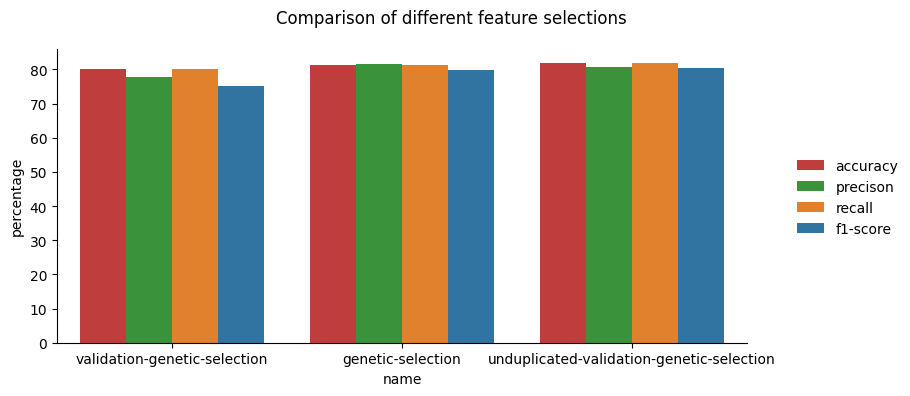

In [15]:
result_dfm = pd.melt(result_df, id_vars=("name"), value_vars=("accuracy", "precison", "recall", "f1-score"), var_name="metric", value_name="percentage")
g = sb.FacetGrid(result_dfm, height=4, aspect=2, )
g.map_dataframe(sb.barplot, data=result_dfm, x="name", y="percentage", hue="metric", palette=["tab:red", "tab:green", "tab:orange", "tab:blue"])
g.fig.suptitle("Comparison of different feature selections")
g.add_legend()
g.tight_layout()

In [16]:
result_df

,name,accuracy,precison,recall,f1-score
0,validation-genetic-selection,79.962802,77.647986,79.962802,75.122995
1,genetic-selection,81.254805,81.502961,81.254805,79.847696
2,unduplicated-validation-genetic-selection,81.862368,80.658984,81.862368,80.317983
